In [1]:
# https://www.youtube.com/watch?v=uqomO_BZ44g&list=PLDl34vvdJq9v2E5xJSI-wWzJJST8_jLxd&index=20
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2, os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
img = image.load_img('CarTrain/train/01.honda_civic_13_15/101.jpg')
#plt.imshow(img)
cv2.imread('CarTrain/train/01.honda_civic_13_15/101.jpg').shape

(183, 275, 3)

In [3]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset = train.flow_from_directory('CarTrain/train/',target_size = (150,120))
test_dataset = train.flow_from_directory('CarTrain/test/',target_size = (150,120))

Found 8594 images belonging to 8 classes.
Found 780 images belonging to 8 classes.


In [5]:
#test_dataset.classes
#train_dataset.classes

In [6]:
train_dataset.class_indices
test_dataset.class_indices

{'01.honda_civic_13_15': 0,
 '02.honda_civic_16_21': 1,
 '03.honda_accord_13_15': 2,
 '04.honda_accord_16_17': 3,
 '05.honda_accord_18_21': 4,
 '06.toyota camry 12-14': 5,
 '07.toyota camry 15-17': 6,
 '08.toyota camry 18-21': 7}

In [7]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (150,120,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    ##
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(8,activation = 'softmax')  #sigmoid if binary classes
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
#model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy, optimizer = 'adam', metrices = ['accuracy'])

model.compile(
    #loss = tf.keras.losses.CategoricalCrossentropy, 
    loss='categorical_crossentropy',
    optimizer = 'adam', 
    metrics = ['accuracy']
)

In [12]:
model.fit(
    x=train_dataset, 
    #step_per_epoch=3, 
    #batch_size=12,
    epochs=10, 
    validation_data=test_dataset
)

Epoch 1/10
269/269 [==============================] - 6s 23ms/step - loss: 2.0514 - acc: 0.1670 - val_loss: 2.0198 - val_acc: 0.2051
Epoch 2/10
269/269 [==============================] - 6s 22ms/step - loss: 1.9554 - acc: 0.2533 - val_loss: 1.8982 - val_acc: 0.2628
Epoch 3/10
269/269 [==============================] - 6s 22ms/step - loss: 1.7012 - acc: 0.3776 - val_loss: 1.7460 - val_acc: 0.3679
Epoch 4/10
269/269 [==============================] - 6s 22ms/step - loss: 1.2722 - acc: 0.5524 - val_loss: 1.6651 - val_acc: 0.4154
Epoch 5/10
269/269 [==============================] - 6s 22ms/step - loss: 0.7659 - acc: 0.7383 - val_loss: 1.9117 - val_acc: 0.4423
Epoch 6/10
269/269 [==============================] - 6s 21ms/step - loss: 0.3600 - acc: 0.8904 - val_loss: 2.2487 - val_acc: 0.4628
Epoch 7/10
269/269 [==============================] - 6s 21ms/step - loss: 0.1714 - acc: 0.9576 - val_loss: 2.7262 - val_acc: 0.4295
Epoch 8/10
269/269 [==============================] - 6s 21ms/step - 

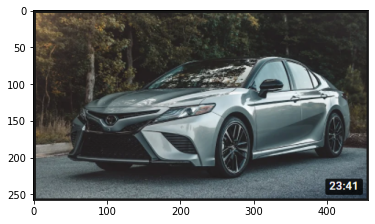

'08.toyota camry 18-21'

In [55]:
file_path = r'C:\Users\Shio\Desktop\WeChat Screenshot_20211129091159.png'
img = image.load_img(file_path)
plt.imshow(img)
plt.show()
img = image.load_img(file_path, target_size = (150,120,3))

X = image.img_to_array(img)
X = np.expand_dims(X,axis=0)
images = np.vstack([X])

val = model.predict(images)
cls = ['01.honda_civic_13_15',
'02.honda_civic_16_21',
'03.honda_accord_13_15',
'04.honda_accord_16_17',
'05.honda_accord_18_21',
'06.toyota camry 12-14',
'07.toyota camry 15-17',
'08.toyota camry 18-21']

# print(val)
# val_l = val.astype(int)[0]
# print(val_l)
# print(val_l[6])

def vai(va):
    for i in list(range(0,len(va[0]))):
        if va[0][i] != 0:
            return i
    return -1
        
cls[vai(val)]